<img src="Tp2.png">

## Introduction :
> Cette méthode de classification non supervisée rassemble un ensemble d’algorithmes d’apprentissage dont le but est de regrouper entre elles des données non étiquetées présentant des propriétés similaires. Isoler ainsi des schémas ou des familles permet aussi de préparer le terrain pour l’application ultérieure d’algorithmes d’apprentissage supervisé (comme le K-means).

<h1><font color='bleu'>1. L'algorithme de K-means : Clustering</font></h1>

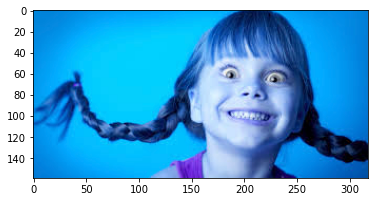

In [4]:
#We should install openCV First with this command in Windows :"pip install opencv-python" 
import matplotlib.pyplot as plt
import numpy as np
import cv2 # If the image cannot be read then this method returns an empty matrix.
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('smile.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('smile2.jpg', quant)
plt.imshow(image)

cv2.imread('smile2.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

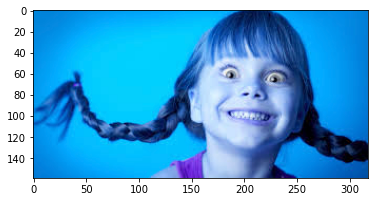

In [5]:
plt.imshow(image)

<h1><font color='bleu'>2. Bruit sur l'image</font></h1>

In [6]:
!pip install opencv-python

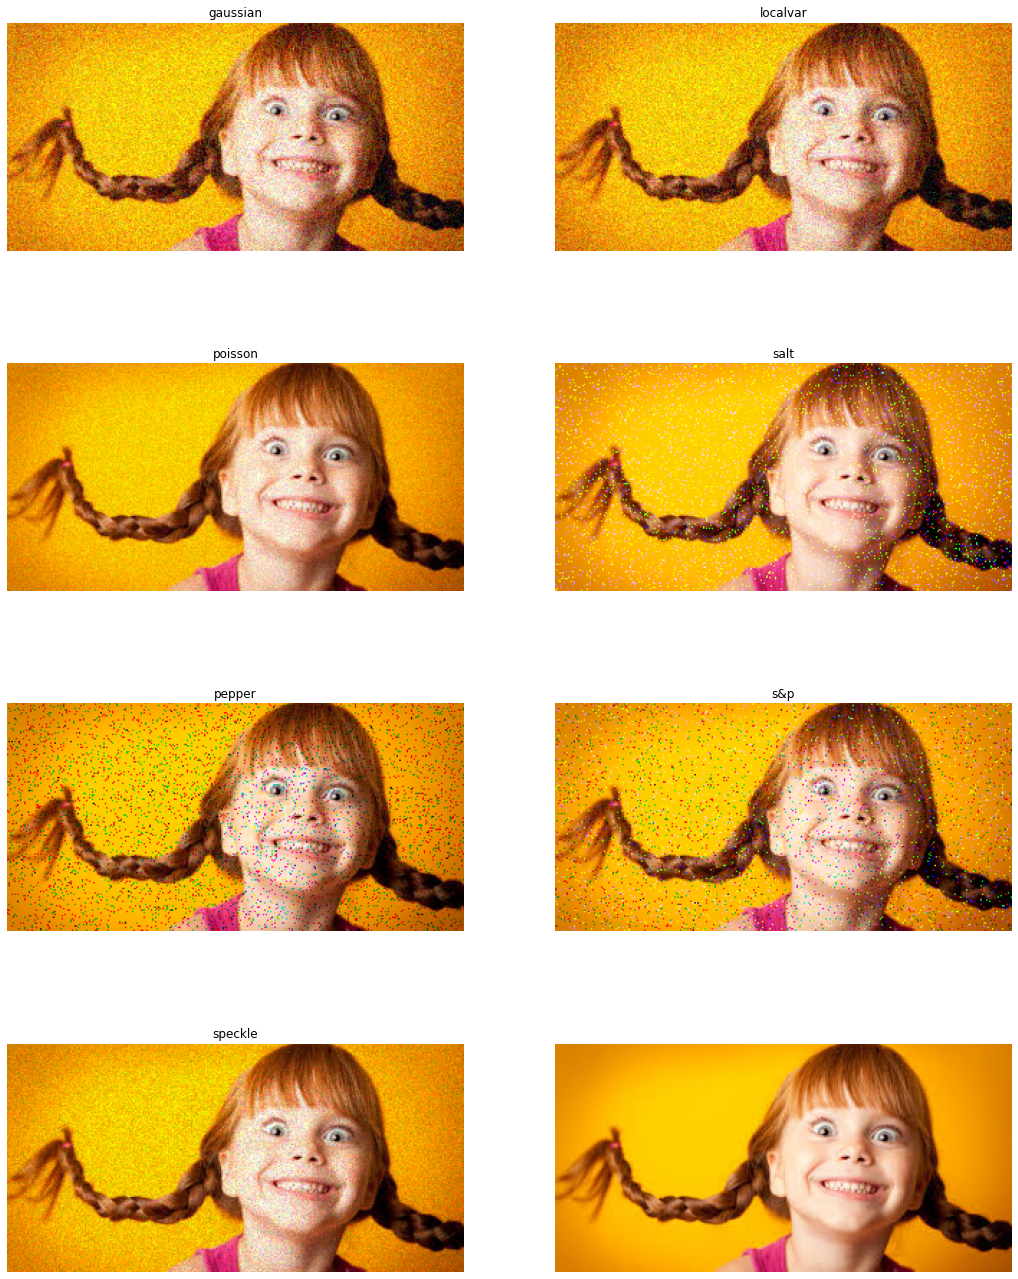

In [7]:
import skimage.io
import matplotlib.pyplot as plt
img_path="smile.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()



<h1><font color='bleu'>3. Elimination des bruits</font></h1>

True

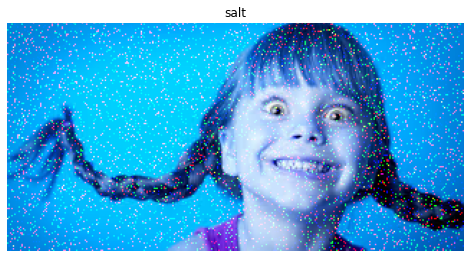

In [8]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
import skimage.io

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        plt.imsave('smile4.png',gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")


image = cv2.imread('smile.jpg')

(h1, w1) = image.shape[:2]

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(image, "salt", r,c,4)

cv2.imwrite('smile5.jpg', quant)

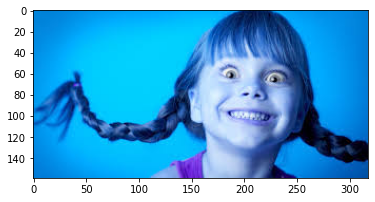

In [9]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('smile.jpg')
(h1, w1) = image.shape[:2]

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters =3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))


cv2.imwrite('smile5.jpg', quant)
plt.imshow(image)

### <u> Avec le filtre  "Median filtre" </u>

In [14]:

import numpy
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("smile4.png").convert(
        "L")
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3) 
    img = Image.fromarray(removed_noise)
    img.show()
    plt.imsave('smile5.jpg', img)
    
    image = cv2.imread('smile5.jpg')
    (h1, w1) = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = 5)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    
    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    
    cv2.imwrite('simle6.jpg', quant)   

main()

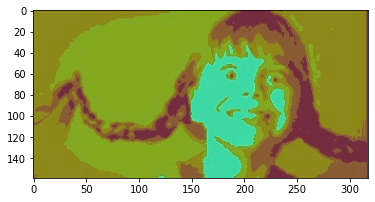

In [22]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('simle6.jpg')
(h1, w1) = image.shape[:2]
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
    
clt = KMeans(n_clusters = 20)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
    
#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    
cv2.imwrite('smile4.jpg', quant)   
plt.imshow(image)
cv2.imread('smile2.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import session_info
session_info.show()

ModuleNotFoundError: No module named 'session_info'